In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean,cov,8000)

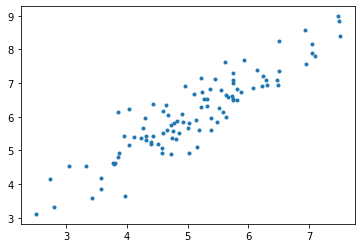

In [6]:
#Visualising data
plt.scatter(data[:100,0], data[:100, 1],marker = '.')
plt.show()

In [7]:
# train-test-split
data = np.hstack((np.ones((data.shape[0], 1)), data))
split_factor = 0.75
split = int(split_factor * data.shape[0])

X_train, X_test = data[:split, :-1], data[split:, :-1]
Y_train, Y_test = data[:split, -1].reshape((-1,1)), data[split:, -1].reshape((-1,1))

print("Training set = %d"%(X_train.shape[0]))
print("Testing set = %d"%(X_test.shape[0]))

Training set = 6000
Testing set = 2000


In [20]:
def hypothesis(X, theta):
    return np.dot(X, theta)

def gradient(X,Y,theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h-Y))
    return grad

def cost(X, Y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h-Y).transpose(), (h-Y))
    J /=2
    return J[0]
    

In [21]:
def create_mini_batches(X, Y, batch_size):
    mini_batches = [] 
    data = np.hstack((X, Y))
    np.random.shuffle(data)
    n_mini_batches = data.shape[0]
    i = 0
    for i in range(n_mini_batches+1):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        X_mini = mini_batch[:, :-1] 
        Y_mini = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches

In [22]:
# function to perform mini-batch gradient descent 
def gradientDescent(X, Y, learning_rate = 0.001, batch_size = 32): 
    theta = np.zeros((X.shape[1], 1)) 
    error_list = [] 
    max_iters = 3
    for itr in range(max_iters): 
        mini_batches = create_mini_batches(X, Y, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, Y_mini = mini_batch 
            theta = theta - learning_rate * gradient(X_mini, Y_mini, theta) 
            error_list.append(cost(X_mini, Y_mini, theta)) 
  
    return theta, error_list

Bias =  [0.73759953]
Coefficients =  [[1.02630676]]


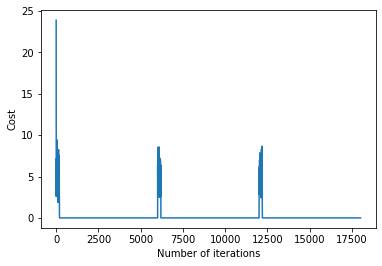

In [23]:
theta, error_list = gradientDescent(X_train, Y_train) 
print("Bias = ", theta[0]) 
print("Coefficients = ", theta[1:]) 
  
# visualising gradient descent 
plt.plot(error_list) 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost") 
plt.show()

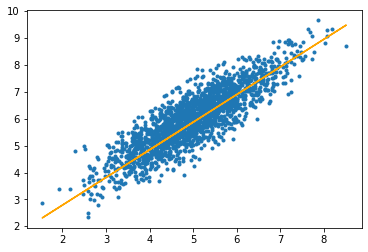

Mean absolute error =  0.46029326072264803


In [25]:

# predicting output for X_test 
Y_pred = hypothesis(X_test, theta) 
plt.scatter(X_test[:, 1], Y_test[:, ], marker = '.') 
plt.plot(X_test[:, 1], Y_pred, color = 'orange') 
plt.show() 
  
# calculating error in predictions 
error = np.sum(np.abs(Y_test - Y_pred) / Y_test.shape[0]) 
print("Mean absolute error = ", error) 

All the code belongs to this website- https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/ . 
I just followed the steps till end and went along the flow
